In [7]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [8]:
from template_matching_funcs import template_matching, thresholding, get_Fourier_coeffs_and_kernel

def get_kernel_baseline(image, template, order, kernel_size,
                       morph_open, morph_close, dilate):
    img_match = template_matching(image=image, template=template, method=cv2.TM_CCORR)
    img_thresh = thresholding(img_match)
    
    kern = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  # np.ones((5,5),np.uint8)
    if morph_open:
        img_thresh = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kern)
    if morph_close:
        img_thresh = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kern)
    if dilate:
        img_thresh = cv2.dilate(img_thresh,kern,iterations = 1)
    
    plt.imshow(img_thresh, cmap='gray')
    plt.show()
    _, kernel = get_Fourier_coeffs_and_kernel(img_thresh, order=order, kernel_size=kernel_size)
    
    return kernel

### Example 1

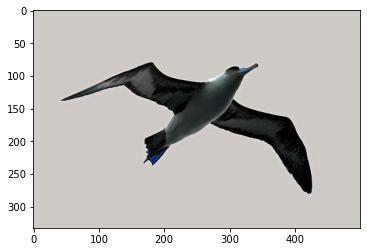

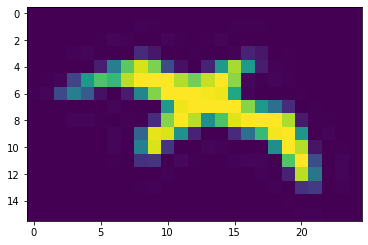

In [17]:
path_data = '/home/e_radionova/cig5_Research_optimal_kernels/Unet_birds/'+ \
            'Caltech_birds/CUB_200_2011/dataset/train/'

img_rgb = cv2.imread(path_data + 'images/002.Laysan_Albatross/Laysan_Albatross_0050_870.jpg')

template_mask = Image.open(path_data + 'masks/002.Laysan_Albatross/Laysan_Albatross_0050_870.png')
width, height = template_mask.size
template_mask = template_mask.resize((25, int(25 * height/width)),Image.ANTIALIAS)

# template_mask.save("./kernel.jpg",quality=95)
# template_mask = cv2.imread("./kernel.jpg")
# template_mask = template_mask[:,:,0]
template_mask = np.array(template_mask)
template_mask = template_mask.astype(np.uint8)

plt.imshow(img_rgb)
plt.show()
plt.imshow(template_mask)

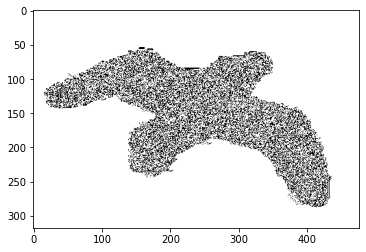

In [18]:
kernel_per_img = get_kernel_baseline(image=img_rgb, 
                                    template=template_mask, 
                                    order=10, 
                                    kernel_size=20,
                                    morph_open=False, 
                                    morph_close=False, 
                                    dilate=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


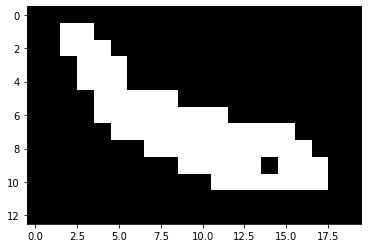

In [63]:
plt.imshow(kernel_per_img)

### Example 2

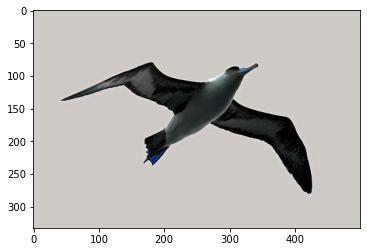

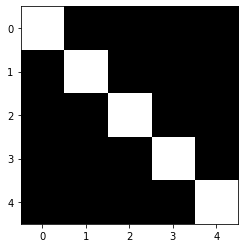

In [59]:
path_data = '/home/e_radionova/cig5_Research_optimal_kernels/Unet_birds/'+ \
            'Caltech_birds/CUB_200_2011/dataset/train/'

img_rgb = cv2.imread(path_data + 'images/002.Laysan_Albatross/Laysan_Albatross_0050_870.jpg')

template = Image.open(path_data + 'masks/002.Laysan_Albatross/Laysan_Albatross_0050_870.png')

template_by_hand = np.array([[1., 0., 0., 0., 0. ],
                             [0., 1., 0., 0., 0. ],
                             [0., 0., 1., 0., 0. ],
                             [0., 0., 0., 1., 0. ],
                             [0., 0., 0., 0., 1. ]])

plt.imshow(img_rgb)
plt.show()
plt.imshow(template_by_hand, cmap='gray')

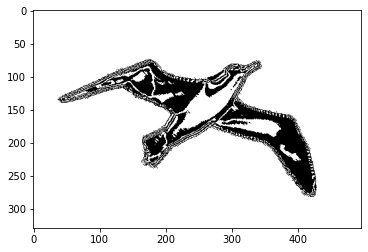

In [60]:
kernel_per_img = get_kernel_baseline(image=img_rgb, 
                                    template=template_by_hand, 
                                    order=10, 
                                    kernel_size=20,
                                    morph_open=False, 
                                    morph_close=False, 
                                    dilate=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


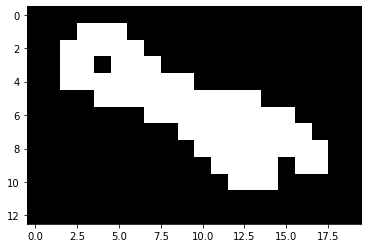

In [61]:
plt.imshow(kernel_per_img)